In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('gene_expression.csv')

In [3]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


(4.0, 8.0)

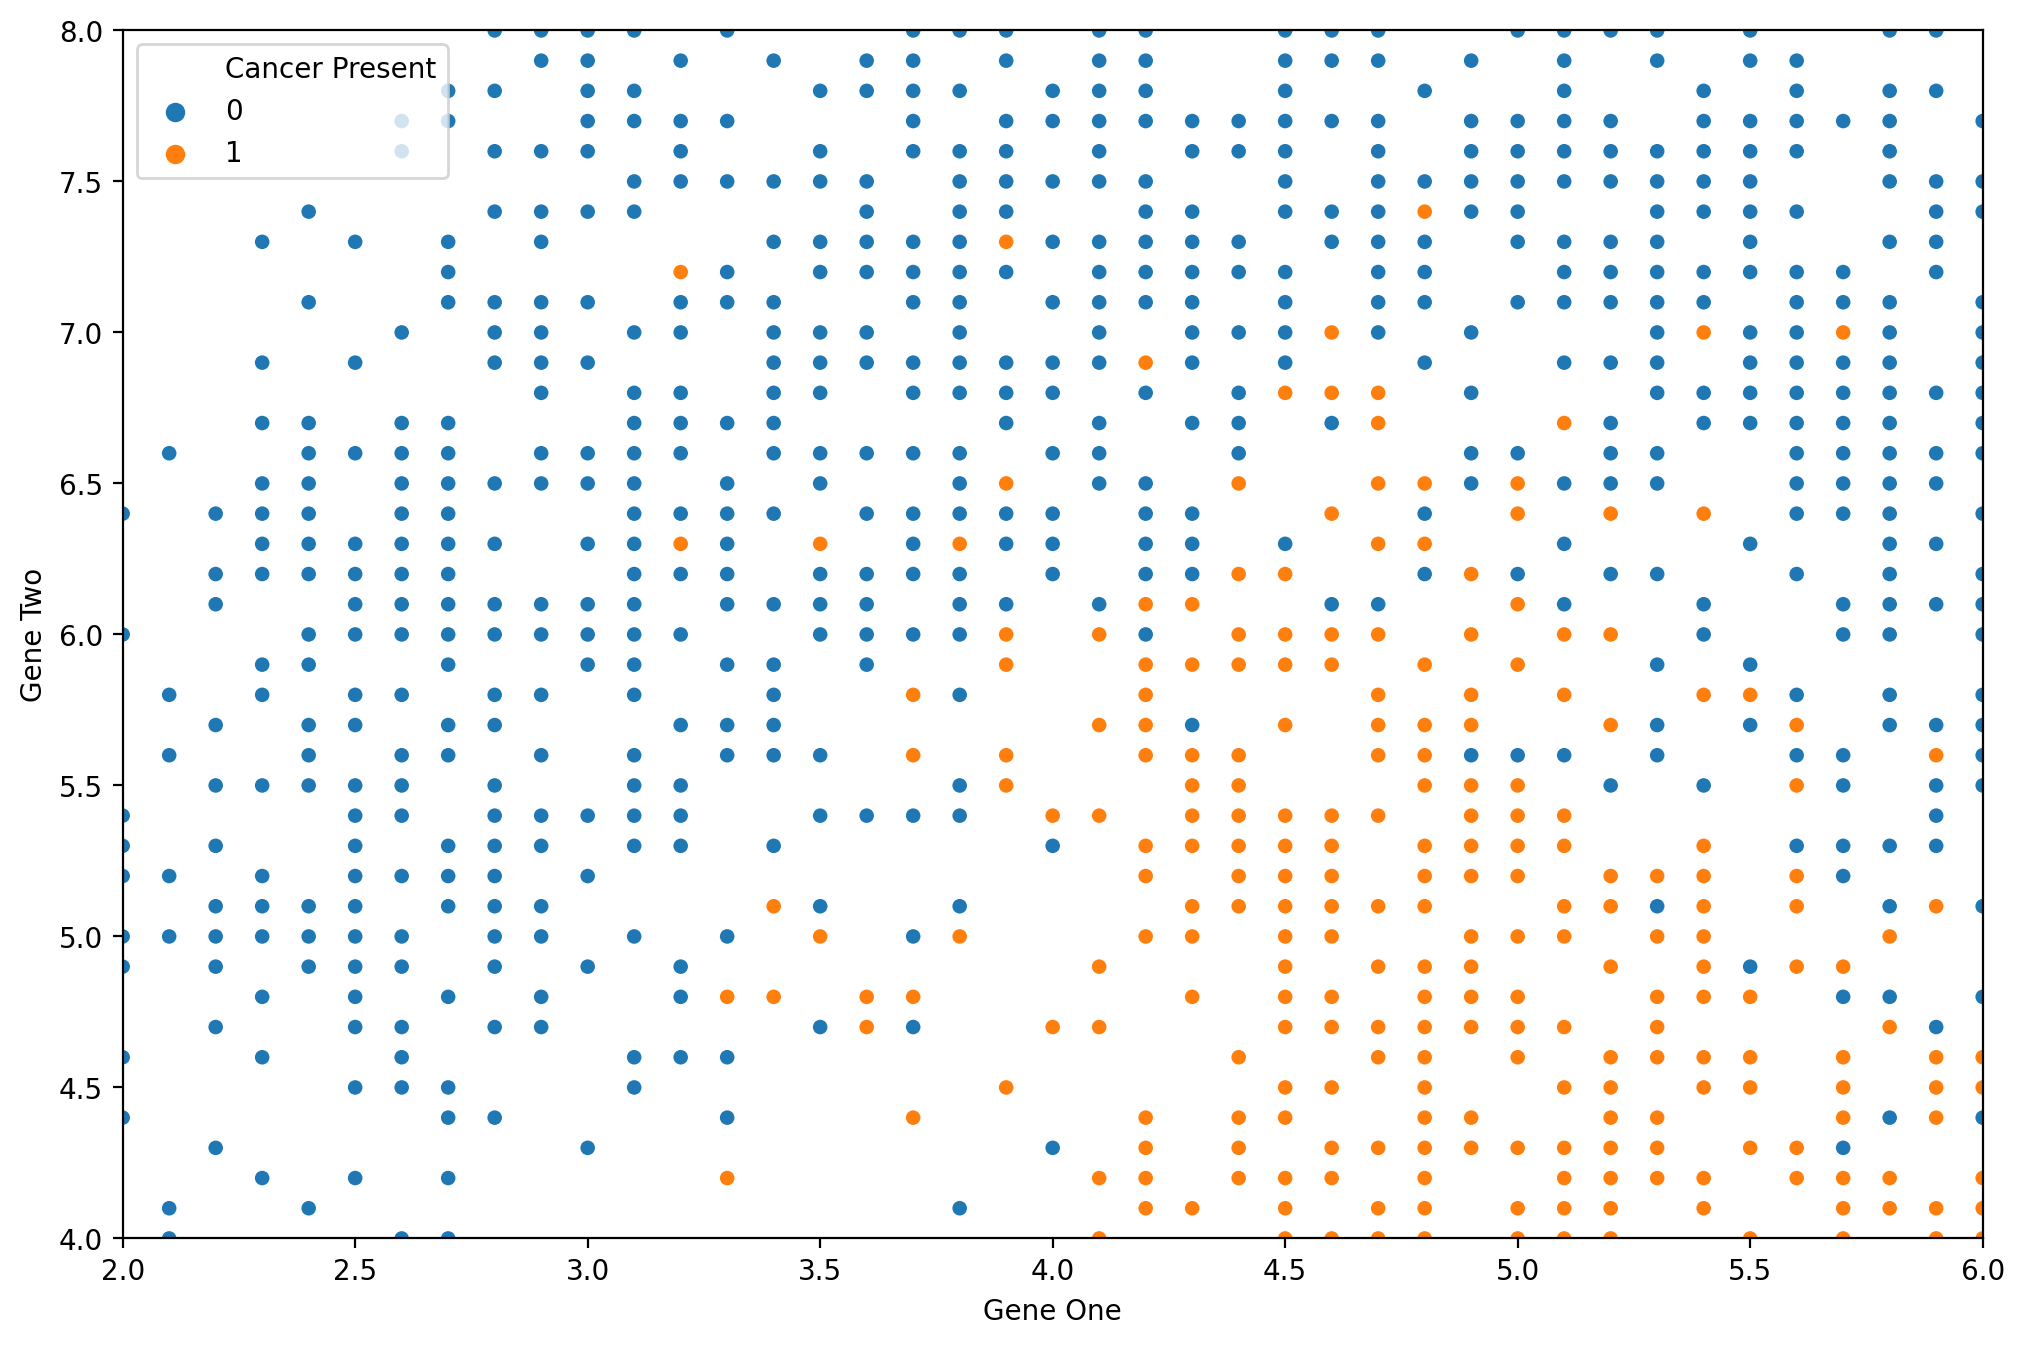

In [11]:
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(data = df,x = 'Gene One',y = 'Gene Two',hue = 'Cancer Present')
plt.xlim(2,6)
plt.ylim(4,8)


<Figure size 2400x1600 with 0 Axes>

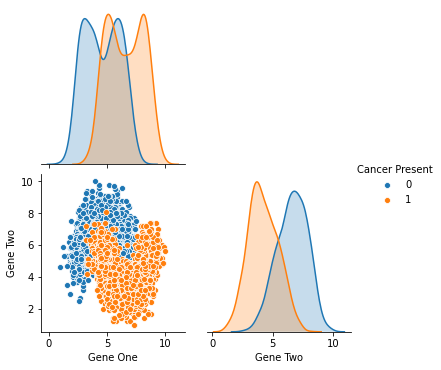

In [12]:
plt.figure(figsize=(12,8),dpi=200)
sns.pairplot(data = df,hue = 'Cancer Present',corner=True)

In [13]:
 from sklearn.model_selection import train_test_split

In [17]:
X = df.drop('Cancer Present',axis=1)
y = df['Cancer Present']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [14]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()

In [20]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
k_model = KNeighborsClassifier(n_neighbors=1)

In [26]:
k_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [27]:
y_pred = k_model.predict(X_test)

In [28]:
from sklearn.metrics import plot_confusion_matrix,classification_report

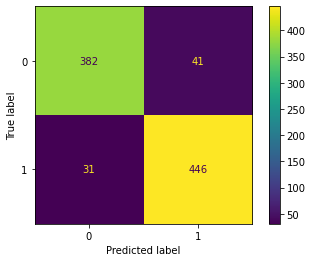

In [30]:
plot_confusion_matrix(k_model,X_test,y_test)

In [31]:
 len(y_test)

900

In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       423
           1       0.92      0.94      0.93       477

    accuracy                           0.92       900
   macro avg       0.92      0.92      0.92       900
weighted avg       0.92      0.92      0.92       900

